In [17]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [22]:
from modules.replace_dep import replace_with_dict
replace_with_dict("언홍영")

'언홍영'

In [3]:
df_abstact_wrangle = pd.read_csv("data_wrangled/df_abstract_wrangle.csv", encoding="utf-8")
df_abstact_wrangle.sample(5)

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
10494,US000233,스크랜튼!,심리학과,학부,2011,1,0.523097,http://oia.yonsei.ac.kr/partner/expReport.asp?...
8068,US000188,UCB 경험보고서~,철학과,학부,2011,0,0.690637,http://oia.yonsei.ac.kr/partner/expReport.asp?...
810,CA000011,U of A 경험보고서,전기전자공학,학부,2008,1,0.658435,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3044,GB000017,University of Sheffield,경영학과,학부,2012,1,0.515649,http://oia.yonsei.ac.kr/partner/expReport.asp?...
9926,US000207,UIUC 에서 교환 2학기의 소중한 경험하고 왔습니다!,토목환경공학과,학부,2015-2016,1,0.631528,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [4]:
departments = list(df_abstact_wrangle["학과"].unique())
print(len(departments), departments[:10])

1234 ['사회복지학과/언론홍보영상학부', '건축학과', '경영학과', '경제', '언론홍보영상학', '중어중문학과', '정치외교학과', '행정학과', '경제학부', '언론홍보영상학부']


In [5]:
df_abstact_wrangle["학과"] = df_abstact_wrangle["학과"].fillna(" ")
df_abstact_wrangle["학과"].isnull().values.any()

False

In [6]:
import re
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def split_double_majors(str):
    return re.split(',|/', str)

def chainer(series):
    # print(series)
    return list(chain.from_iterable(series.apply(split_double_majors)))

# calculate lengths of splits
# lens = df_abstact_wrangle['학과'].str.split('/').map(len)
lens = df_abstact_wrangle['학과'].apply(split_double_majors).map(len)
lens

0        2
1        1
2        1
3        1
4        1
        ..
11178    1
11179    2
11180    1
11181    1
11182    1
Name: 학과, Length: 11183, dtype: int64

In [7]:
# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'대학코드': np.repeat(df_abstact_wrangle['대학코드'], lens),
                    '제목': np.repeat(df_abstact_wrangle['제목'], lens),
                    '학과': chainer(df_abstact_wrangle['학과']),
                    '과정': np.repeat(df_abstact_wrangle['과정'], lens),
                    '년도': np.repeat(df_abstact_wrangle['년도'], lens),
                    'BERT_SCORE': np.repeat(df_abstact_wrangle['BERT_SCORE'], lens),
                    'RNN_SCORE': np.repeat(df_abstact_wrangle['RNN_SCORE'], lens),
                    'REVIEW_LINK': np.repeat(df_abstact_wrangle['REVIEW_LINK'], lens),})
res

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
0,730,리투아니아에서 행복했던 4개월,사회복지학과,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,리투아니아에서 행복했던 4개월,언론홍보영상학부,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,아르헨티나 교환학생(어학연수프로그램),건축학과,학부,2013-1,0,0.399670,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,쿠프슈타인에서 노후 50년 땡겨쓰기,경영학과,학부,2017-2018,0,0.416185,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,평화로운 쿠프에서의 한 학기,경제,학부,2017ㅡ2018,1,0.816743,http://oia.yonsei.ac.kr/partner/expReport.asp?...
...,...,...,...,...,...,...,...,...
11179,US000301,Spring 2019 at Case,경영학과,학부,2019,1,0.512358,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11179,US000301,Spring 2019 at Case,심리학과,학부,2019,1,0.512358,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11180,US000301,"Case, 나의 대학생활 최고의 순간",창의기술경영학과,학부,2017-2018,1,0.699721,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11181,US000303,미국 Liberal Arts College에서의 교환생활,언더우드학부 경제학과,학부,2020,0,0.686848,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [21]:
df_department = res[["대학코드", "학과", "REVIEW_LINK"]]
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학부,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [22]:
df_department["학과"] = df_department["학과"].apply(lambda x: replace_with_dict(x))
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학부,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축공학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [11]:
from collections import Counter
print(Counter(df_department["학과"]))
# print(Counter(temp))

Counter({'경영학과': 2311, '경제학과': 702, '영어영문학과': 599, '정치외교학과': 532, '신문방송학과': 349, '심리학과': 265, '행정학과': 219, '영어영문학전공': 202, '사회학과': 190, '교육학과': 180, '응용통계학과': 177, '중어중문학과': 142, '상경계열': 137, '건축공학과': 132, '불어불문학과': 128, '언론홍보영상학부': 126, '사학과': 123, '의류환경학과': 121, '국어국문학과': 121, '인문학부': 108, '독어독문학과': 102, '노어노문학과': 99, '전기전자공학부': 87, '사회복지학과': 81, '법학과': 71, '문화인류학과': 68, '문헌정보학과': 68, '기계공학과': 66, '전기전자공학과': 65, '정보산업공학과': 64, '화공생명공학과': 60, '철학과': 59, 'UIC': 58, '생명공학과': 58, '영어영문': 56, '신학과': 56, '생활디자인학과': 55, '아동가족학과': 55, '식품영양학과': 53, '수학과': 53, '화학과': 52, '신소재공학과': 50, '경제학전공': 49, '심리학전공': 49, '컴퓨터과학과': 47, '경제학부': 46, '도시공학과': 46, '의예과': 45, '실내건축학과': 44, '의공학부': 44, '주거환경학과': 43, '동아시아국제학부': 39, '생활디자인': 38, '영어영문학': 38, '생화학과': 38, '경제': 36, '토목환경공학과': 35, '국제학과': 35, '화학공학과': 33, '언더우드국제대학': 33, '정치외교': 32, '스포츠레저학과': 32, '심리학': 32, '국제학대학원': 28, '전기전자공학': 26, '중어중문학전공': 26, '철학': 24, '유럽어문학부': 24, '물리학과': 24, '국제관계학과': 24, '정치외교학': 23, '생명공학전공': 21, '기계전자공학부': 21, 'Under

In [12]:
from math import nan

departments = df_department["학과"].unique()
# departments = temp.unique()

korean_deparments = []
english_departments = []
for department in departments:
    if type(department) == float:
        pass
    elif not re.search(r'[a-zA-Z]', department):
        korean_deparments.append(department)
    else:
        english_departments.append(department)


In [13]:
# print(len(korean_deparments), korean_deparments)
print(len(korean_deparments),sorted(korean_deparments))

719 [' ', ' 52-134', ' 경영', ' 경영학', ' 경영학과', ' 경제', ' 경제학', ' 경제학 전공', ' 경제학과', ' 교육학과', ' 국어국문학과', ' 도시공학과', ' 문과대학 문정과', ' 문화 & 미디어', ' 문화비평학 연계전공', ' 문화인류학', ' 문화인류학과', ' 불어불문학', ' 불어불문학과', ' 비교문학과문화학', ' 사학과', ' 사회학', ' 사회학과', ' 산업시스템 공학', ' 생활디자인학과', ' 수학과', ' 시스템생물학과', ' 신문방송학과', ' 심리', ' 심리학과', ' 언론홍보영상학', ' 언론홍보영상학부', ' 영문', ' 영어영문학', ' 영어영문학과', ' 응용통계학', ' 응용통계학과', ' 의류환경', ' 일본학', ' 정보인터랙션디자인', ' 정치외교학', ' 정치외교학과', ' 중어중문학', ' 철학', ' 컴퓨터과학', ' 컴퓨터과학과', ' 화학과', '..', '1020011', '2012121230', '간호학과', '감호학과', '건설환경공학과', '건설환경공학부', '건축공학 ', '건축공학과', '경영 ', '경영학과', '경재학과', '경제', '경제.수학', '경제학', '경제학과', '경제학과 응용통계학과', '경제학부', '경제학전공', '경제힉과', '계량위험관리', '계량위험관리학과', '공과대학 금속시스템공학', '공과대학 기계공학부', '공과대학 생명공학과', '공과대학 세라믹공학과', '공과대학 신소재공학', '공과대학 전기전자공학부', '공과대학 정보산업공학', '공과대학 컴퓨터과학과', '공과대학 토목환경공학', '과학기술정책', '교육', '교육과학대학', '교육과학대학 교육학과', '교육과학대학 사회체육과', '교육과학대학 스포츠레저학과', '교육과학대학 체육교육학과', '교육과학대학교', '교육대학원', '교육대학원 영어교육학과', '교육학', '교육학과', '교육학과 ', '교육학과 (영문학 이중전공)', '교육학과(국문이중)', '교육학

In [14]:
print(len(english_departments), english_departments)

190 ['EIC', 'Underwood International College', 'UD 국제학과', 'GSIS', 'EESE', 'Information and Interaction Design', 'Economics (UIC)', 'UIC - PSIR', 'UIC 아시아학과', 'UIC 문학과 문화학', 'UIC', ' TAD (IID & CDM)', 'International Studies', 'UIC경제학과', 'International Trade', ' Finance and Management', '언더우드학과 ud', 'Psychology', 'UIC(Quantitativive Risk Management)', 'UD ECON', '언더우드학부- 정치외교학과 (PSIR)', '국제학부 HASS SDC(지속개발협력)', '언더우드학부-국제학 (UD-IS)', 'UIC 생명과학공학', '국제학부 PSIR', ' Underwood Division', ' PSIR', '동아시아국제학부(EIC)', 'ASD', 'International studies', 'UIC 경제', 'Energy& Environmental Science Engineering', 'UIC ECON', '경영전문대학교 GMBA', 'Economics', '테크노아트학부 CDM', 'UIC국제학과', 'UIC 경제학과', 'UIC 비교문학', 'Social Sciences', 'philosophie', '에너지환경융합(EESE)', 'UIC 생명과학공학과', 'UIC 테크노아트학부', 'Quantitative Risk Management', 'Comparative Literature & Culture', 'Underwood Division', 'UIC PSIR', '국제대ASD', 'UIC 문화디자인경영', '국제학과 (International Studies)', '계량위험관리(QRM)', 'PSIR', 'Underwood International College - Economics', '

In [15]:
univ_code = "JP000023"
one_univ_departments = df_department.loc[df_department["대학코드"]==univ_code]["학과"]
one_univ_departments

3885         신문방송학과
3886         문헌정보학과
3887           경제학부
3888    문과대학 영어영문학과
3889     정경대학 국제관계학
3890         역사문화학과
3891           교육학과
3892         국어국문학과
3893         생활디자인과
3894         신문방송학과
3895         사회체육학과
3896         영어영문학과
3897        기계전자공학부
3898         신문방송학과
3899         보건행정학과
3900    사회과학계열 행정학과
3901         영어영문학과
3902          도시공학과
3903         정치외교학과
3904           상경계열
3905        생활디자인전공
3906         신문방송학과
Name: 학과, dtype: object

In [16]:
from collections import Counter, OrderedDict

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['신문방송학과', '영어영문학과', '문헌정보학과', '경제학부', '문과대학 영어영문학과', '정경대학 국제관계학', '역사문화학과', '교육학과', '국어국문학과', '생활디자인과', '사회체육학과', '기계전자공학부', '보건행정학과', '사회과학계열 행정학과', '도시공학과', '정치외교학과', '상경계열', '생활디자인전공'] [4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
from collections import Counter, OrderedDict

univ_code = "DE000003"
one_univ_departments = res.loc[res["대학코드"]==univ_code]["학과"]
one_univ_departments

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['독어독문학과', '독어독문학', '독어독문', '경영학과', '정치외교학과', '영어영문학과', '생활디자인학과', '사학과', '영어영문학', '문화인류학과', 'philosophie', '사회복지학과', '교육학과', '심리학과', '독어독문학전공', '경영학전공', '인문학부', '유럽어문학부', '상경계열', '영어영문학전공'] [25, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


NanumGothic


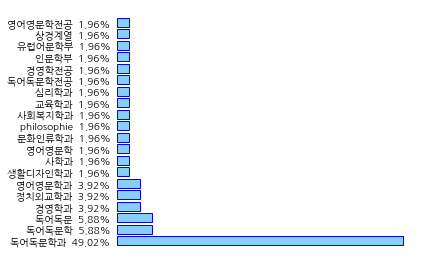

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트 설정
fontpath = '/Users/noopy/yonsei-exchange-program/font/NanumGothic.ttf'
from matplotlib import font_manager, rc
font_manager._rebuild()
font_name = font_manager.FontProperties(fname=fontpath).get_name()
print(font_name)
rc('font', family=font_name)


fig, ax = plt.subplots()

total = sum(number_of_students)

np_number = np.array(number_of_students)

percent = np_number/total*100

new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(departments, percent)]

plt.barh(departments, np_number, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(departments)), new_labels)
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", left=False)
plt.show()

# Top 3해서 pie chart로 보여주기 vs 기타 과에 무슨 과가 있는지 써주는 정도
# Top 5 subplot으로 보여주기
# %가 아니라 몇 명 다녀갔는지 보여주기


In [27]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

# font_manager._rebuild()

Nanum Myeongjo /System/Library/AssetsV2/com_apple_MobileAsset_Font6/5c10807185ddbca859bc0b3ecefe55ebb1985aa9.asset/AssetData/NanumMyeongjo.ttc
NanumGothic /Users/noopy/Library/Fonts/NanumGothic.ttf
Nanum Gothic /System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/AssetData/NanumGothic.ttc
Nanum Brush Script /System/Library/AssetsV2/com_apple_MobileAsset_Font6/3b0bb049516d6dd825e1cd8731587ca7415517ff.asset/AssetData/NanumScript.ttc
NanumBarunGothic /Users/noopy/Library/Fonts/NanumBarunGothic.ttf


In [32]:
dict_example.keys()
dict_example.values()

dict_values([['경영', '경영-경제 이중전공', '경영대학', '경영대학 경영학과', '경영대학 경영학부', '경영대학원', '경영전공', '경영정보학', '경영정보학과', '경영정보학과&신문방송학과', '경영정보학전공', '경영학', '경영학(복수)', '경영학과', '경영학과 (컴퓨터 과학)', '경영학과 대학원', '경영학과 이중전공', '경영학과(응통 이중)', '경영학과(이중)', '경영학관', '경영학규ㅏ', '경영학부', '경영학전공'], ['경재학과', '경제', '경제.수학', '경제학', '경제학 전공', '경제학과', '경제학과 응용통계학과', '경제학부', '경제학전공', '경제힉과'], ['영문', '영문과', '영문학', '영문학 및 신방과', '영문학과', '영상디자인전공', '영어 영문학과', '영어문학과', '영어영문', '영어영문과', '영어영문학', '영어영문학 & 경영학', '영어영문학 (복수)', '영어영문학 및 문화비평학전공', '영어영문학과', '영어영문학과(경제학과)', '영어영문학과과', '영어영문학전공', '영여영문과', '영여영문학과'], ['정외', '정외과', '정치외교', '정치외교학', '정치외교학과', '정치외교학교', '정치학과'], ['심리', '심리학', '심리학 이중전공', '심리학 인지과학', '심리학과', '심리학과 복전', '심리학이중전공', '심리학전공'], ['행정', '행정학', '행정학과', '행정학과 (경영학 이중전공)'], ['사회', '사회학', '사회학&신학과', '사회학과', '사회학전공'], ['교육학', '교육학과', '교육학과 (영문학 이중전공)', '교육학과(국문이중)', '교육학과(본교)', '교육학과(영어영문 이중전공)', '교육학부', '교육'], ['응용통계', '응용통계학', '응용통계학과', '응용통계학전공', '응통'], ['중문', '중문학과', '중어중문', '중어중문하과', '중어중문학', '중어중문학과', '중어중문학과&경영학과', '중

In [ ]:
dict_reversed = 

In [ ]:
def find_replace(string, dictionary):
    # is the item in the dict?
    for item in string:
        # iterate by keys
        if item in dictionary.keys():
            # look up and replace
            string = string.replace(item, dictionary[item])
    # return updated string
    return string

# call the funciton
find_replace(s,d)
